# IMPORT BASIC REQUIRED LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# LOAD THE DATASET

In [5]:
#Load train data
train_data = pd.read_csv("/Users/saniyaafzali/Downloads/fraudTrain.csv")
#Load test data
test_data = pd.read_csv("/Users/saniyaafzali/Downloads/fraudTest.csv")

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())


Missing Values in Training Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [9]:
train_data.shape

(1296675, 23)

In [10]:
test_data.shape

(555719, 23)

In [11]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [12]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [13]:
print("\n Missing values in Training Data:")
train_data.isnull().sum()


 Missing values in Training Data:


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [14]:
train_data = pd.concat([train_data,test_data],axis = 0)

# DATA PREPROCESSING

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['gender'] = le.fit_transform(train_data['gender'].values)
train_data['job'] = le.fit_transform(train_data['job'].values)
train_data['category'] = le.fit_transform(train_data['category'].values)
train_data['merchant'] = le.fit_transform(train_data['merchant'].values)

In [17]:
# Drop irrelevant columns directly
train_data.drop(columns=['trans_num', 'first', 'last', 'gender', 'trans_date_trans_time','state', 'city',
                       'street', 'zip', 'unix_time', 'job','dob'], inplace=True,axis =1)

# EXPLORATORY DATA ANALYSIS

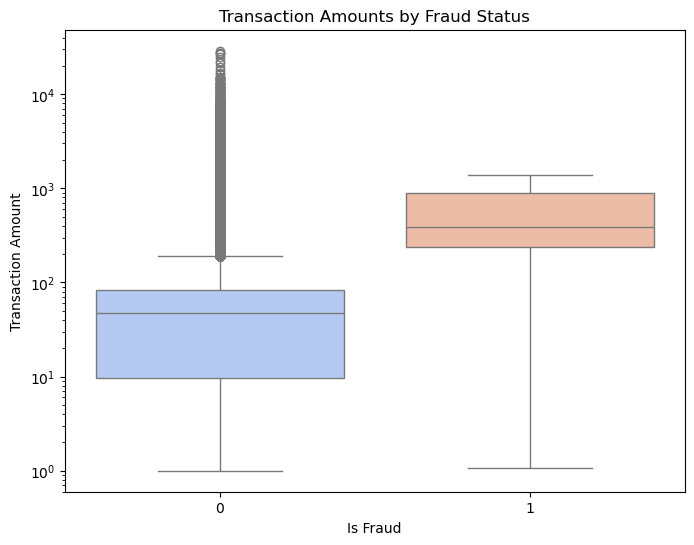

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='amt', data=train_data, palette='coolwarm')
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Use log scale for better visualization of outliers
plt.show()


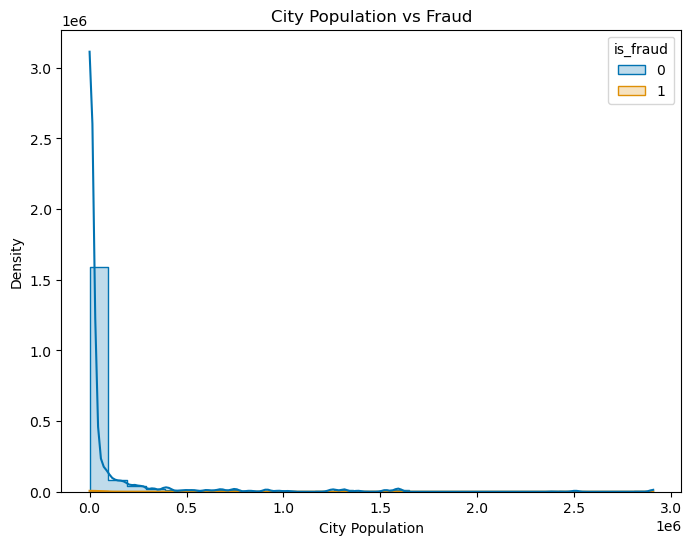

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='city_pop', hue='is_fraud', kde=True, bins=30, palette='colorblind', element='step')
plt.title('City Population vs Fraud')
plt.xlabel('City Population')
plt.ylabel('Density')
plt.show()


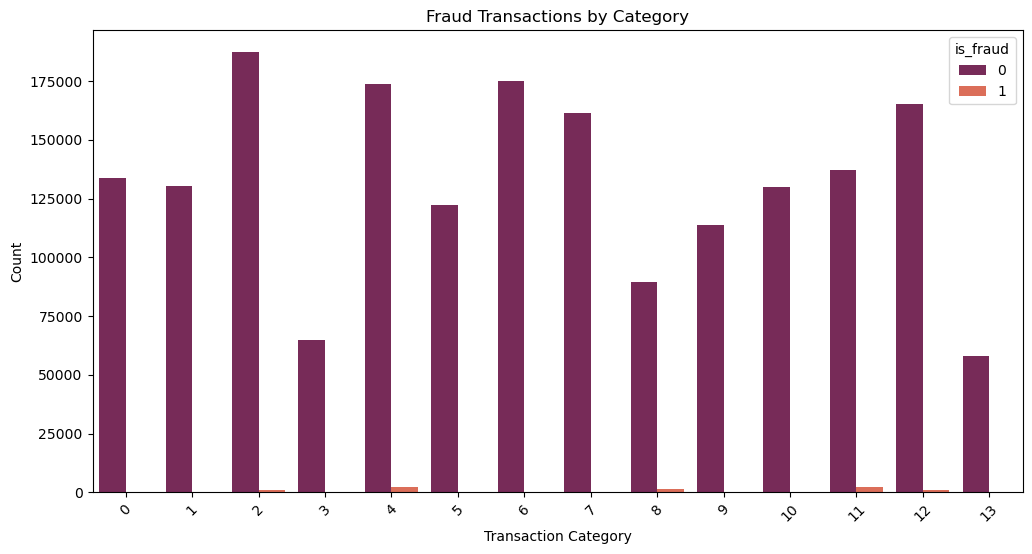

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='category', hue='is_fraud', palette='rocket')
plt.title('Fraud Transactions by Category')
plt.xticks(rotation=45)
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.show()


# DIVIDE DATA INTO X AND Y VARIABLES

In [23]:
X = train_data.drop(columns=['is_fraud'])  
y = train_data['is_fraud'] 

# SPLIT DATA INTO TRAIN AND TEST PART

In [25]:
#importing library
from sklearn.model_selection import train_test_split

#splits the dataset into training and testing sets with a 80-20 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# TRAIN MODEL

## Logistic Regression

In [28]:
# importing library
from sklearn.linear_model import LogisticRegression
# Loading model in variable
LR = LogisticRegression(penalty = 'l2',C= 0.01)

In [29]:
LR.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [30]:
# Predicting the testing data
pred_LR = LR.predict(X_test)

In [31]:
# Evaluates the performance of the trained LR on the testing data
LR.score(X_test,y_test)

0.9947284461467452

In [32]:
#importing library
from sklearn.metrics import accuracy_score

# Calculates Accuracy of Training Data
train_accuracy = accuracy_score(y_train,LR.predict(X_train))
print(train_accuracy)

0.9948053700785807


In [33]:
#importing library
from sklearn.metrics import classification_report

# Displays Classification report
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



In [34]:
y_pred = LR.predict(X_test)
#Calculates Accuracy of Testing data
test_accuracy = accuracy_score(y_test,y_pred)

# Displays the Accuracy of Testing Data
print(test_accuracy)

0.9947284461467452


### Decision Tree

In [36]:
# importing library
from sklearn.tree import DecisionTreeClassifier

# Loading model in variable
DT = DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [37]:
# Training the model x_train and y_train
DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [38]:
# Calculates Accuracy of Training Data
train_accuracy = accuracy_score(y_train,DT.predict(X_train))
print(train_accuracy)

0.9948053700785807


In [39]:
# Predicts Accuracy of Testing data
DT_pred = DT.predict(X_test)

#Calculates Accuracy of Testing data
test_accuracy = accuracy_score(y_test,DT_pred)

# Displays the Accuracy of Testing Data
print(test_accuracy)

0.9947284461467452


In [40]:
pred_dt = DT.predict(X_test)

In [41]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

